In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Data Importing

In [2]:
df= pd.read_json(r"D:\Dinesh\myprojects\loan_approval_dataset\loan_approval_dataset.json")
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [3]:
df.shape

(252000, 13)

In [4]:
df.rename(columns={'Married/Single':'Marital_status'},inplace=True)

# Checking for duplicates

In [5]:
dv = df.duplicated()
print(dv.sum())
df[dv]

0


,Id,Income,Age,Experience,Marital_status,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag


# IDENTIFYING data types & Unique  values for each column

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Marital_status     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 26.9+ MB


In [7]:
df.nunique()

Id                   252000
Income                41920
Age                      59
Experience               21
Marital_status            2
House_Ownership           3
Car_Ownership             2
Profession               51
CITY                    317
STATE                    29
CURRENT_JOB_YRS          15
CURRENT_HOUSE_YRS         5
Risk_Flag                 2
dtype: int64

In [8]:
print(df['Experience'].unique())
print(df['Marital_status'].unique())
print(df['House_Ownership'].unique())
print(df['Car_Ownership'].unique())
print(df['Profession'].unique())
print(df['CITY'].unique())
print(df['STATE'].unique())
print(df['CURRENT_JOB_YRS'].unique())
print(df['CURRENT_HOUSE_YRS'].unique())
print(df['Risk_Flag'].unique())

[ 3 10  4  2 11  0 14 17 12  7  9  6  8  1 13 19 15 20  5 16 18]
['single' 'married']
['rented' 'norent_noown' 'owned']
['no' 'yes']
['Mechanical_engineer' 'Software_Developer' 'Technical_writer'
 'Civil_servant' 'Librarian' 'Economist' 'Flight_attendant' 'Architect'
 'Designer' 'Physician' 'Financial_Analyst' 'Air_traffic_controller'
 'Politician' 'Police_officer' 'Artist' 'Surveyor' 'Design_Engineer'
 'Chemical_engineer' 'Hotel_Manager' 'Dentist' 'Comedian'
 'Biomedical_Engineer' 'Graphic_Designer' 'Computer_hardware_engineer'
 'Petroleum_Engineer' 'Secretary' 'Computer_operator'
 'Chartered_Accountant' 'Technician' 'Microbiologist' 'Fashion_Designer'
 'Aviator' 'Psychologist' 'Magistrate' 'Lawyer' 'Firefighter' 'Engineer'
 'Official' 'Analyst' 'Geologist' 'Drafter' 'Statistician' 'Web_designer'
 'Consultant' 'Chef' 'Army_officer' 'Surgeon' 'Scientist' 'Civil_engineer'
 'Industrial_Engineer' 'Technology_specialist']
['Rewa' 'Parbhani' 'Alappuzha' 'Bhubaneswar' 'Tiruchirappalli[10]'
 

In [9]:
# Select categorical variables
categorical_vars = df.select_dtypes(include=['object'])

# Loop through categorical variables
for column in categorical_vars:
    print(f"Value counts for {column}:")
    print(df[column].value_counts().sort_values(ascending=False))
    print()

Value counts for Marital_status:
single     226272
married     25728
Name: Marital_status, dtype: int64

Value counts for House_Ownership:
rented          231898
owned            12918
norent_noown      7184
Name: House_Ownership, dtype: int64

Value counts for Car_Ownership:
no     176000
yes     76000
Name: Car_Ownership, dtype: int64

Value counts for Profession:
Physician                     5957
Statistician                  5806
Web_designer                  5397
Psychologist                  5390
Computer_hardware_engineer    5372
Drafter                       5359
Magistrate                    5357
Fashion_Designer              5304
Air_traffic_controller        5281
Comedian                      5259
Industrial_Engineer           5250
Mechanical_engineer           5217
Chemical_engineer             5205
Technical_writer              5195
Hotel_Manager                 5178
Financial_Analyst             5167
Graphic_Designer              5166
Flight_attendant              5128
B

# Checking for missing values in columns

In [10]:
(df.isnull().sum()/df.shape[0])*100

Id                   0.0
Income               0.0
Age                  0.0
Experience           0.0
Marital_status       0.0
House_Ownership      0.0
Car_Ownership        0.0
Profession           0.0
CITY                 0.0
STATE                0.0
CURRENT_JOB_YRS      0.0
CURRENT_HOUSE_YRS    0.0
Risk_Flag            0.0
dtype: float64

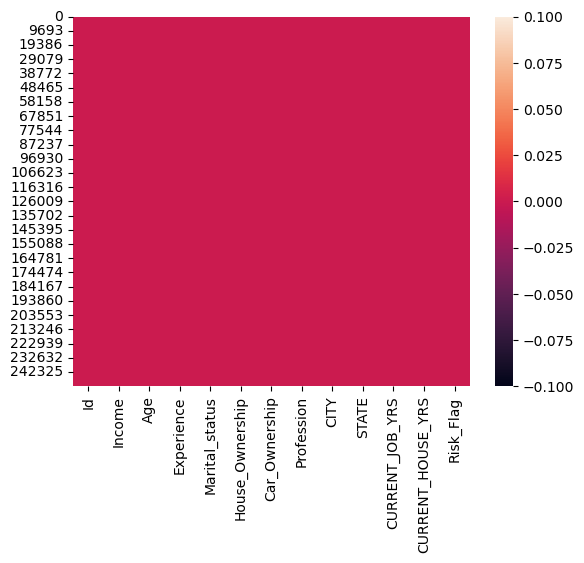

In [11]:
sns.heatmap(df.isnull())
plt.show()

# DROPPING UNNECESSARY COLUMNS & ROWS

In [12]:
df.drop(columns=['Id'],inplace=True)
df.dropna(axis=0,how='any', inplace= True)
print(df.shape)
df.head()

(252000, 12)


,Income,Age,Experience,Marital_status,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


# After Data cleaning we have 252000 rows & 12 Columns in our dataset

In [13]:
df.describe(include='all')

,Income,Age,Experience,Marital_status,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,2.520000e+05,252000.000000,252000.000000,252000,252000,252000,252000,252000,252000,252000.000000,252000.000000,252000.000000
unique,NaN,NaN,NaN,2,3,2,51,317,29,NaN,NaN,NaN
top,NaN,NaN,NaN,single,rented,no,Physician,Vijayanagaram,Uttar_Pradesh,NaN,NaN,NaN
freq,NaN,NaN,NaN,226272,231898,176000,5957,1259,28400,NaN,NaN,NaN
mean,4.997117e+06,49.954071,10.084437,NaN,NaN,NaN,NaN,NaN,NaN,6.333877,11.997794,0.123000
std,2.878311e+06,17.063855,6.002590,NaN,NaN,NaN,NaN,NaN,NaN,3.647053,1.399037,0.328438
min,1.031000e+04,21.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,10.000000,0.000000
25%,2.503015e+06,35.000000,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,11.000000,0.000000
50%,5.000694e+06,50.000000,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,12.000000,0.000000
75%,7.477502e+06,65.000000,15.000000,NaN,NaN,NaN,NaN,NaN,NaN,9.000000,13.000000,0.000000


# Data Visualization

# Univariate Analysis

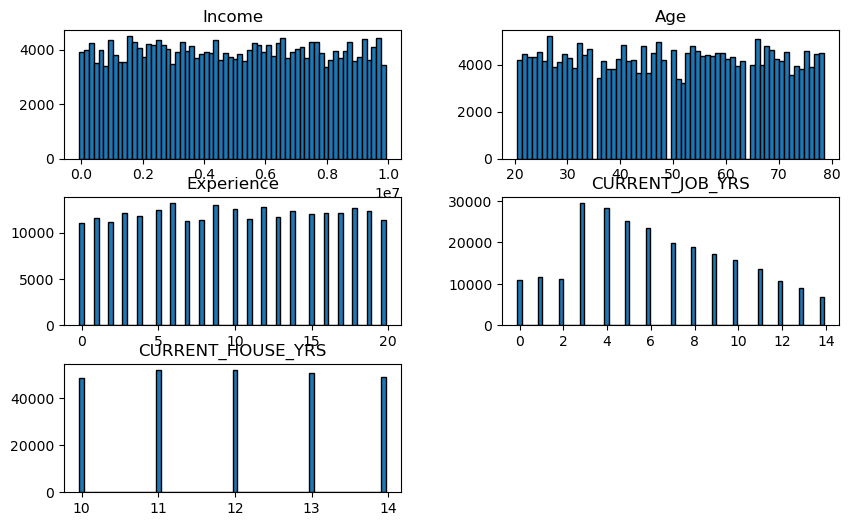

In [14]:
df.hist(column=['Income','Age','Experience','CURRENT_JOB_YRS','CURRENT_HOUSE_YRS'],bins="auto",edgecolor="black",align="left",grid=False,figsize=(10, 6))
plt.show()

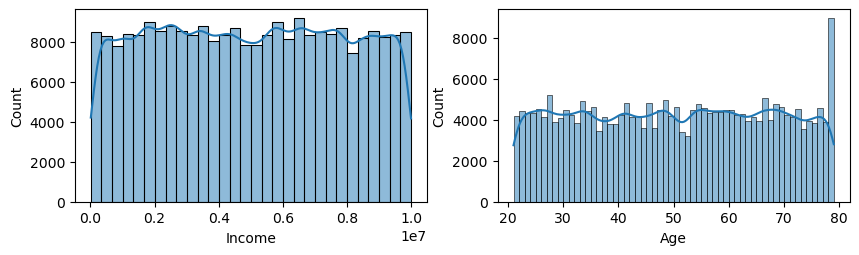

In [15]:
plt.figure(figsize=(10,2.5))
plt.subplot(1,2,1)
sns.histplot(df,x='Income',bins=30,kde=True, edgecolor='black')

plt.subplot(1,2,2)
sns.histplot(df,x='Age',bins=range(min(df['Age']), max(df['Age']) + 1),kde=True, edgecolor='black')
plt.show()

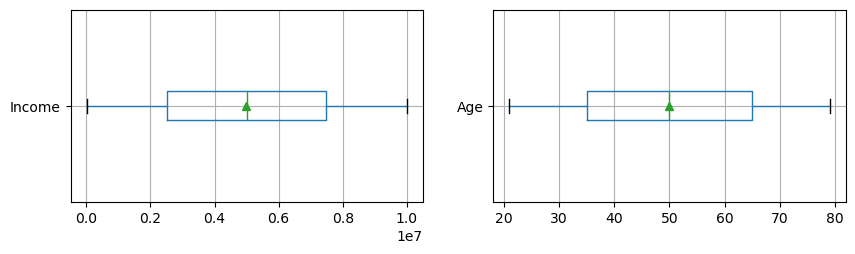

In [16]:
plt.figure(figsize=(10,2.5))
plt.subplot(1,2,1)
df.boxplot(column=["Income"],vert=False,showmeans=True)

plt.subplot(1,2,2)
df.boxplot(column=["Age"],vert=False,showmeans=True)
plt.show()

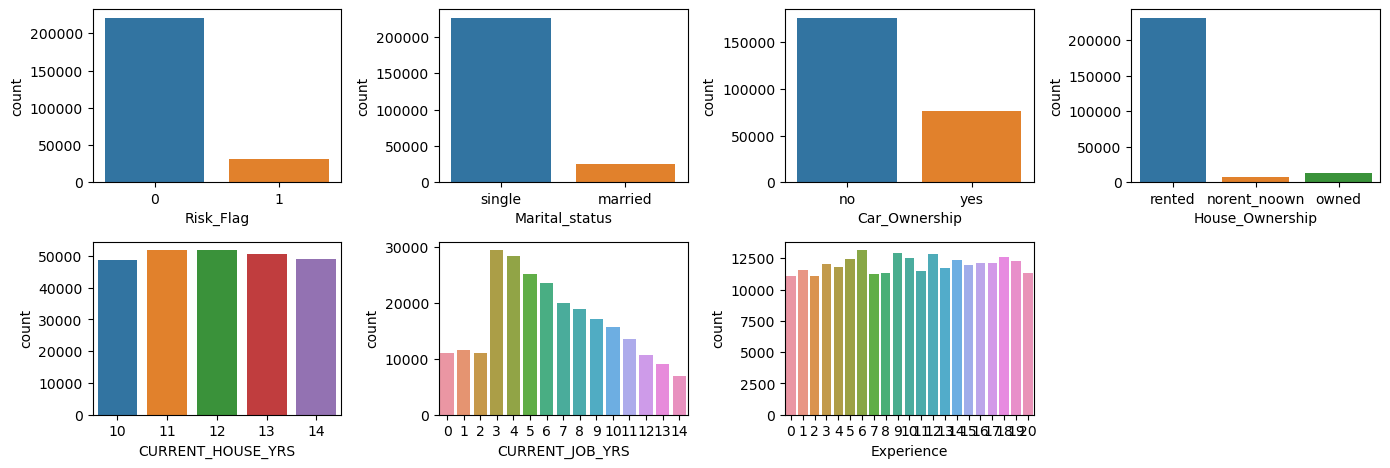

In [17]:
variables = ['Risk_Flag', 'Marital_status', 'Car_Ownership', 'House_Ownership','CURRENT_HOUSE_YRS','CURRENT_JOB_YRS','Experience']

plt.figure(figsize=(14, 9))

for i, var in enumerate(variables, start=1):
    plt.subplot(4, 4, i)
    sns.countplot(data=df, x=var)

plt.tight_layout()
plt.show()

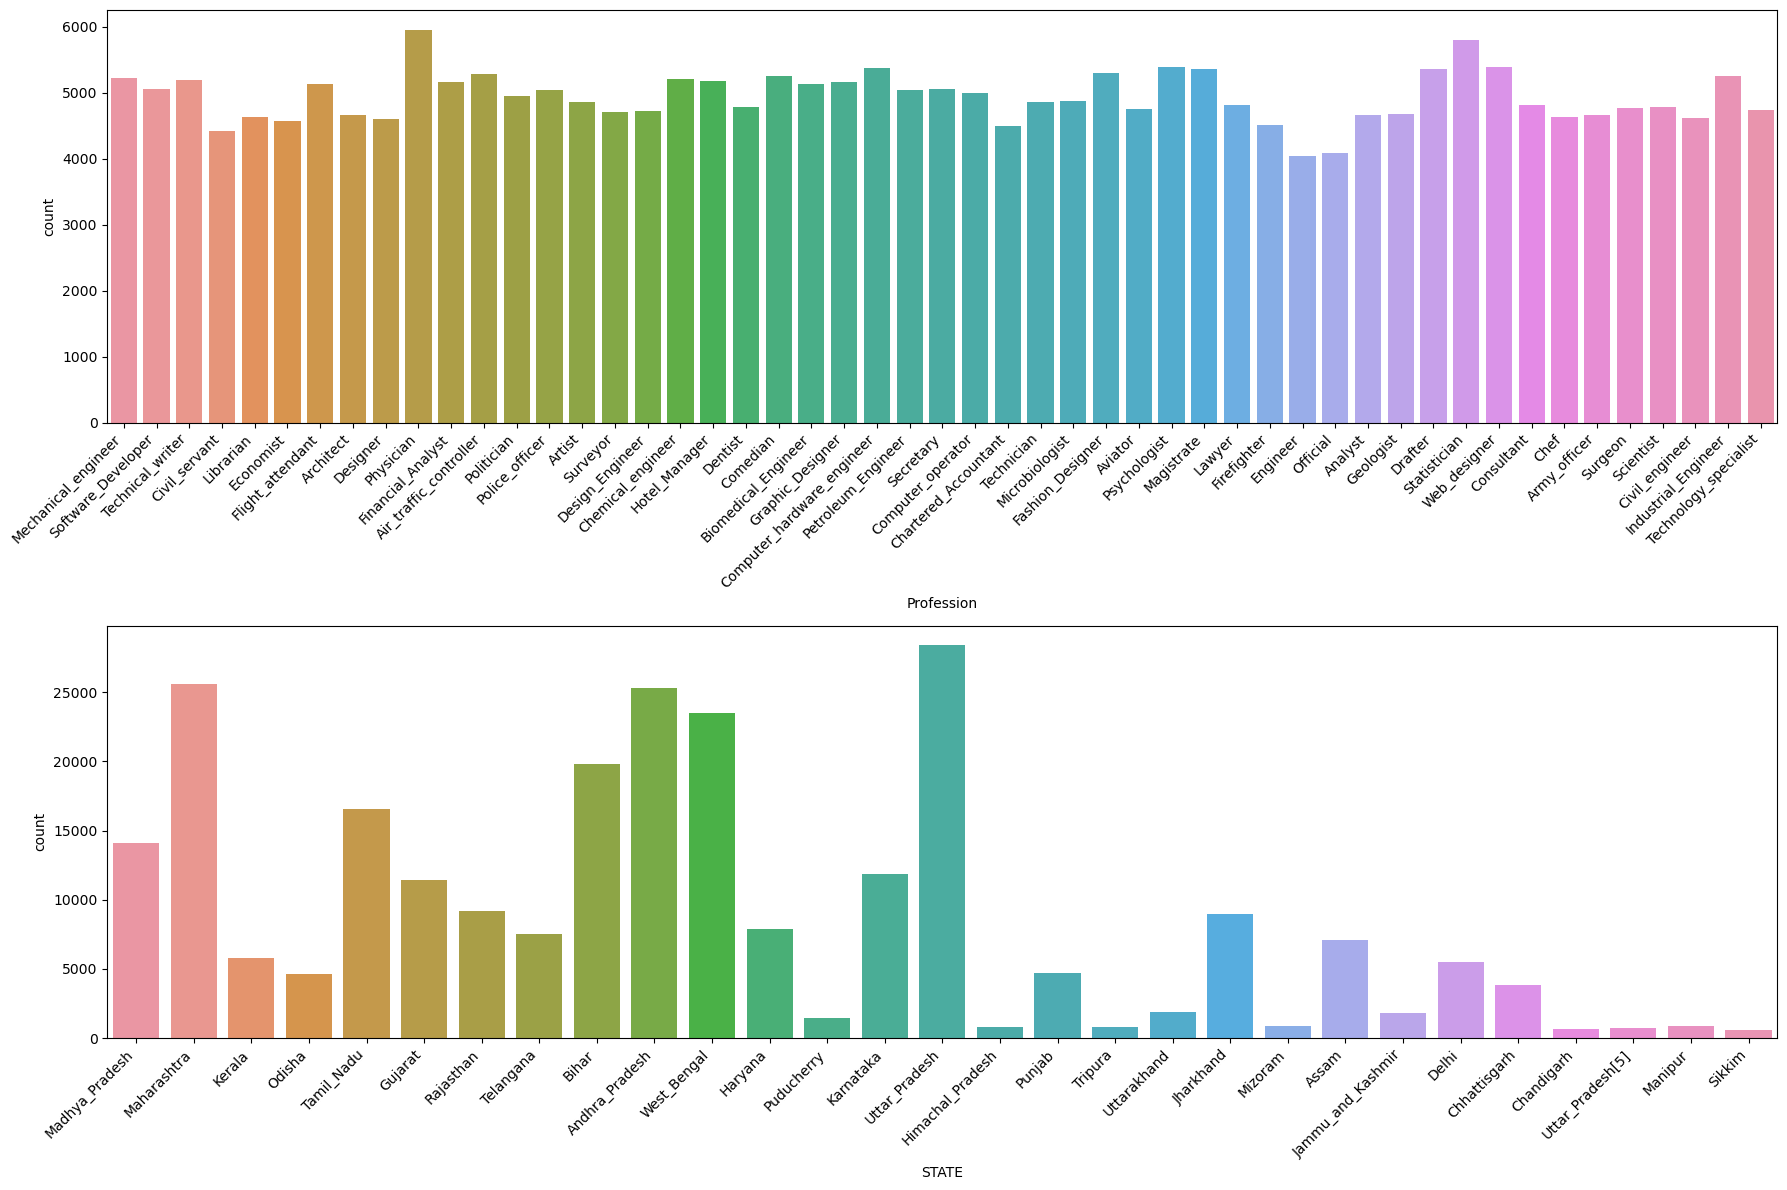

In [18]:
variables = ['Profession','STATE']

plt.figure(figsize=(18, 12))

for i, var in enumerate(variables, start=1):
    plt.subplot(2, 1, i)
    sns.countplot(data=df, x=var)
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

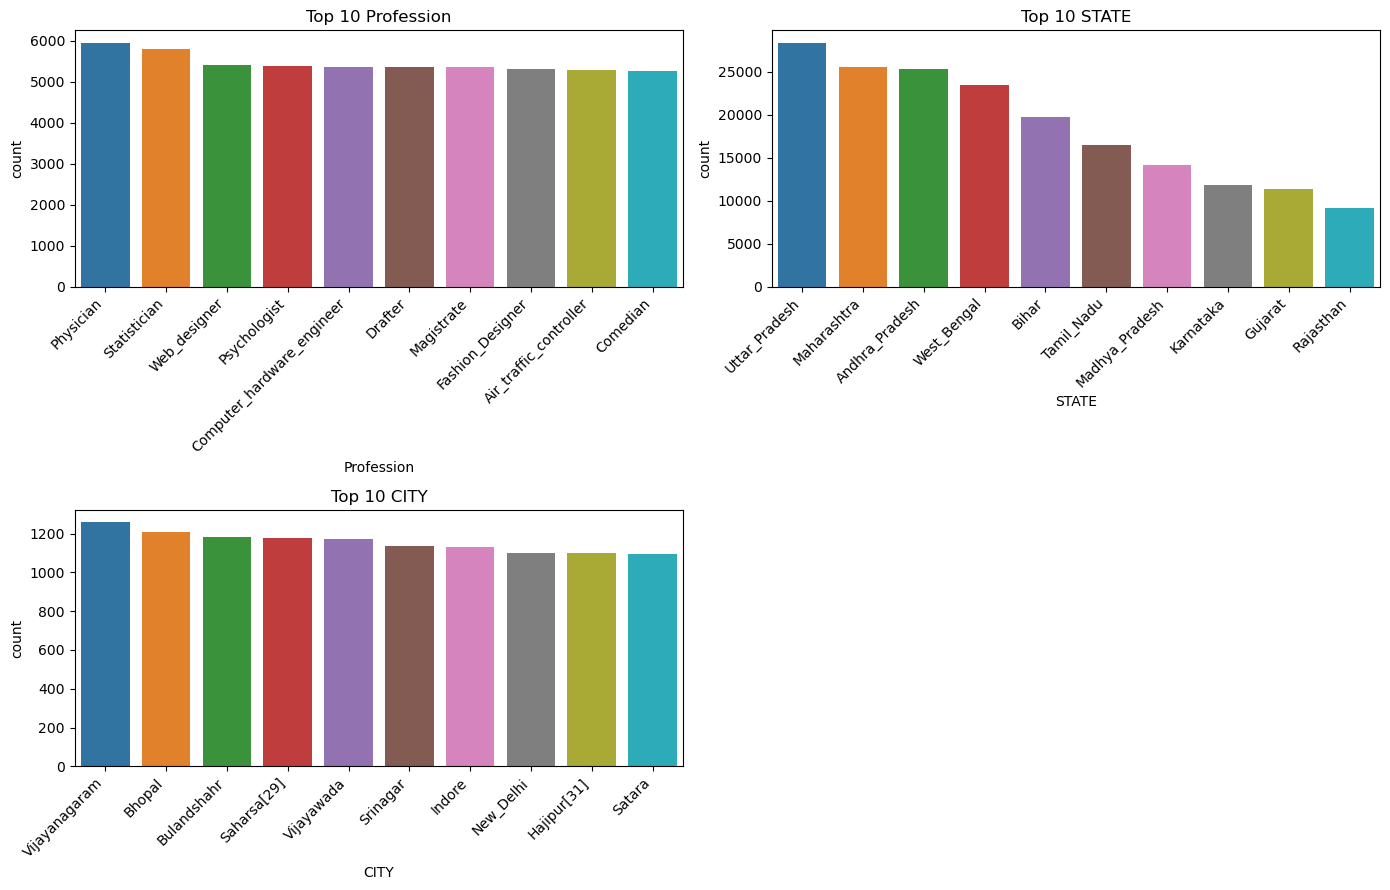

In [19]:
# Get top 10 categories for CITY, STATE, and Profession variables
variables = ['Profession', 'STATE', 'CITY']

# Plotting
plt.figure(figsize=(14, 9))

# Loop through variables and plot
for i, var in enumerate(variables, start=1):
    top_categories = df[var].value_counts().head(10).index.tolist()
    plt.subplot(2, 2, i)
    sns.countplot(data=df[df[var].isin(top_categories)], x=var, order=top_categories)
    plt.title(f'Top 10 {var}')
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

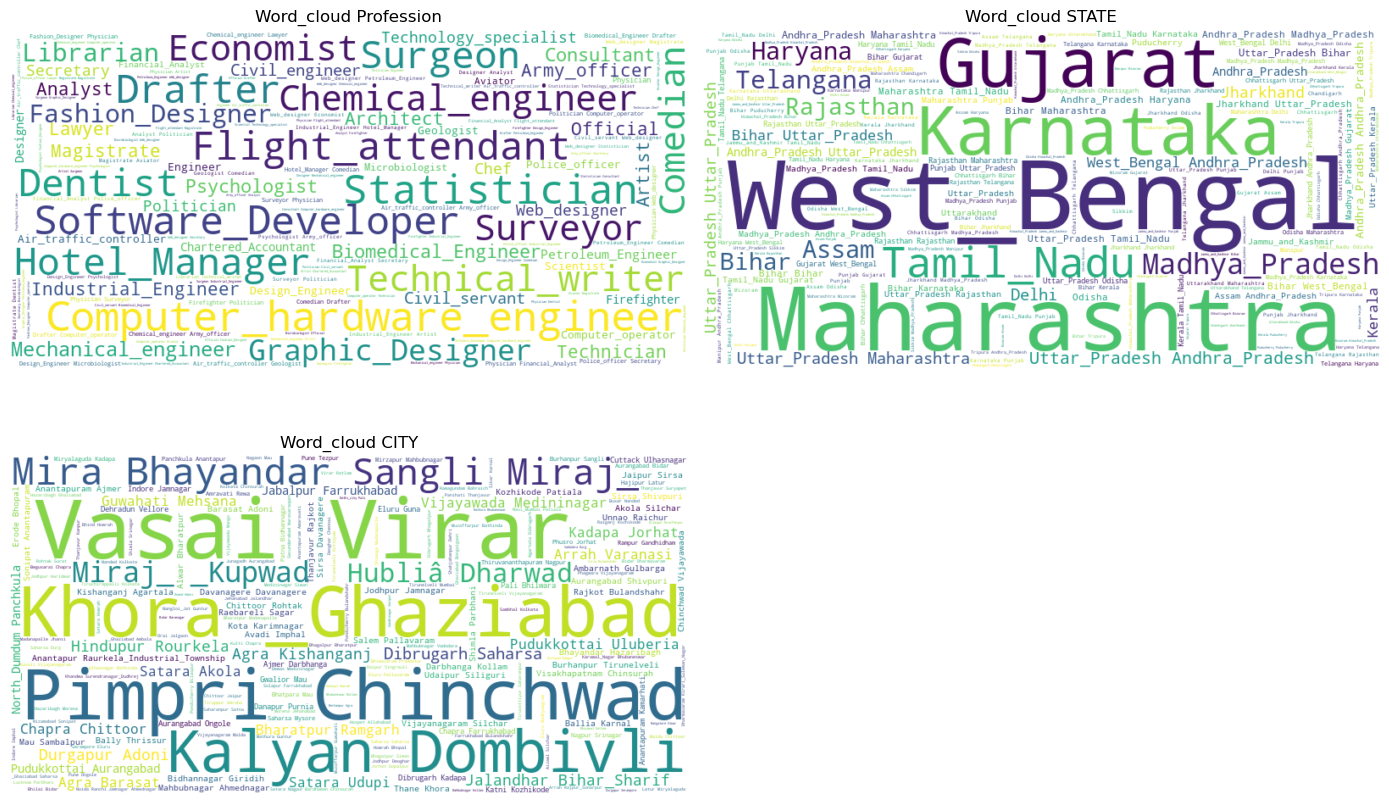

In [20]:
from wordcloud import WordCloud
variables = ['Profession', 'STATE', 'CITY']
plt.figure(figsize=(14, 9))
for i, var in enumerate(variables, start=1):
    all_words = ' '.join(df[var])
    # Create word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)
    plt.subplot(2, 2, i)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word_cloud {var}')
    plt.xticks(rotation=45, ha='right')
    plt.axis('off')
plt.tight_layout()
plt.show()

# Bivariate Analysis

In [21]:
#sns.pairplot(df,hue="Risk_Flag")

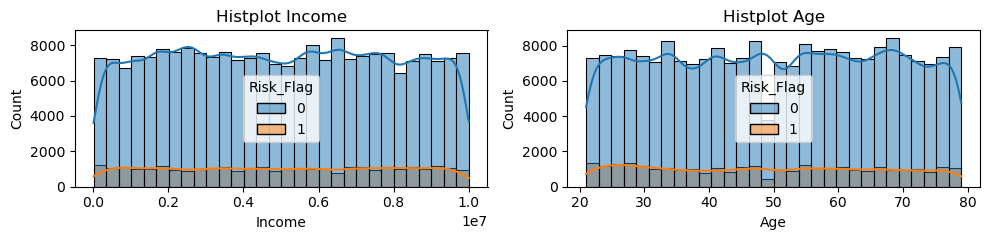

In [22]:
variables = ['Income', 'Age']
plt.figure(figsize=(10,2.5))
for i, var in enumerate(variables, start=1):
    plt.subplot(1, 2, i)
    sns.histplot(df,x=var,bins=30,hue='Risk_Flag',kde=True, edgecolor='black')
    plt.title(f'Histplot {var}')
plt.tight_layout()
plt.show()

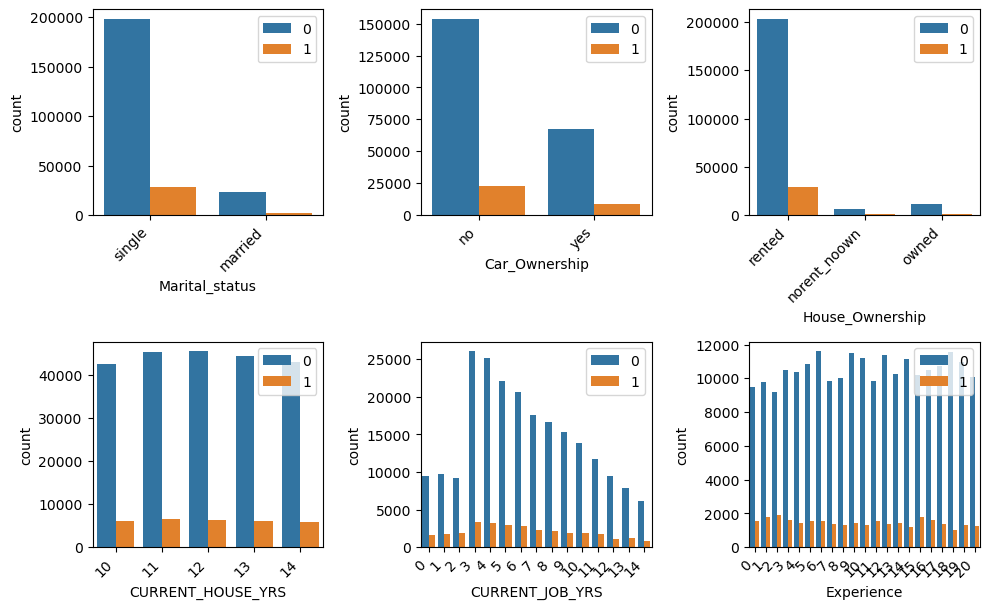

In [23]:
variables = ['Marital_status', 'Car_Ownership', 'House_Ownership','CURRENT_HOUSE_YRS','CURRENT_JOB_YRS','Experience']
plt.figure(figsize=(10, 9))
for i, var in enumerate(variables, start=1):
    plt.subplot(3, 3, i)
    sns.countplot(data=df, x=var,hue='Risk_Flag')
    plt.xticks(rotation=45, ha='right')
    plt.legend(loc=1)
plt.tight_layout()
plt.show()

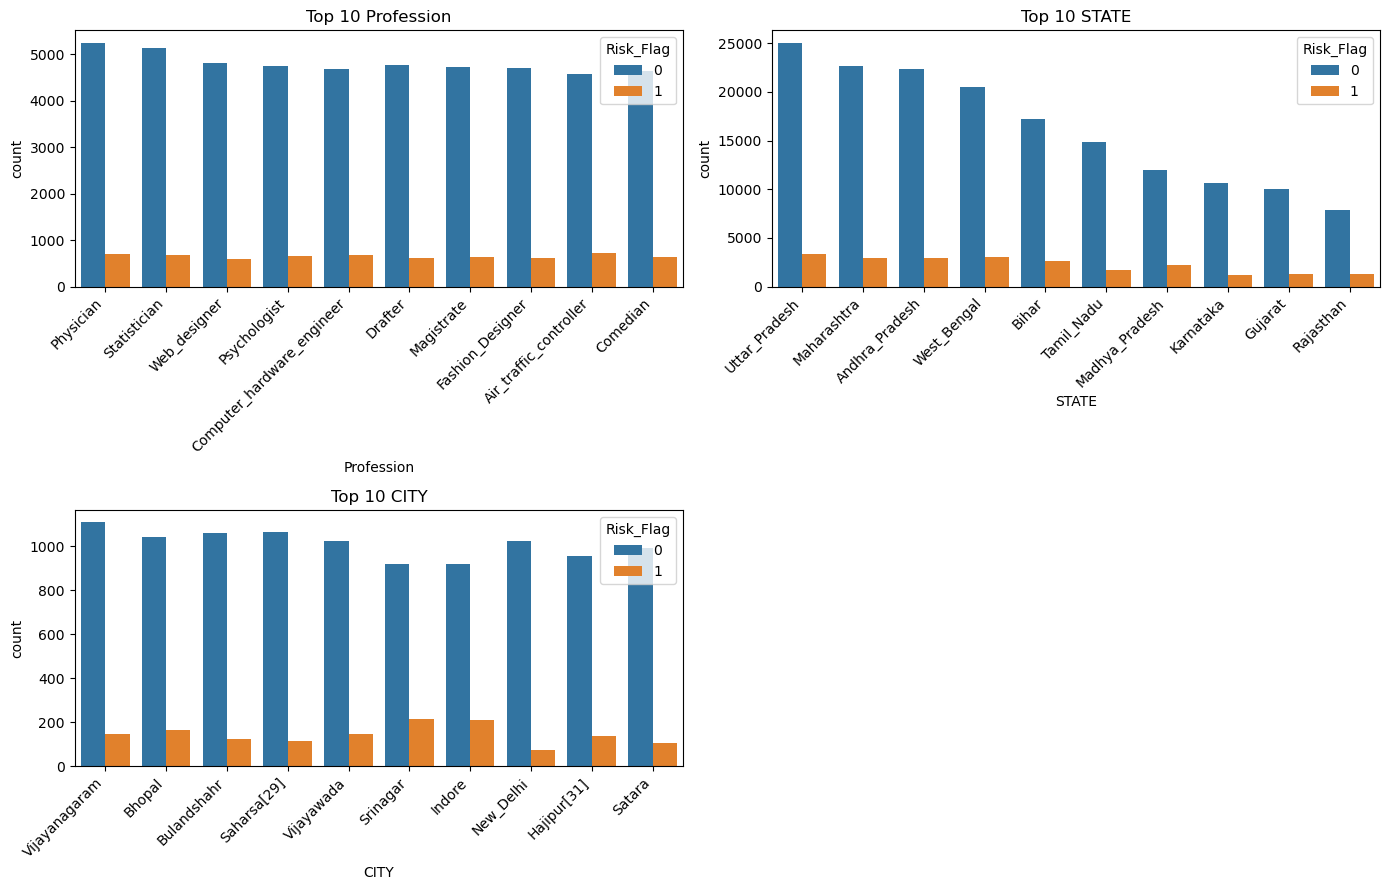

In [24]:
# Get top 10 categories for CITY, STATE, and Profession variables
variables = ['Profession', 'STATE', 'CITY']

# Plotting
plt.figure(figsize=(14, 9))

# Loop through variables and plot
for i, var in enumerate(variables, start=1):
    top_categories = df[var].value_counts().head(10).index.tolist()
    plt.subplot(2, 2, i)
    sns.countplot(data=df[df[var].isin(top_categories)], x=var,hue='Risk_Flag', order=top_categories)
    plt.title(f'Top 10 {var}')
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

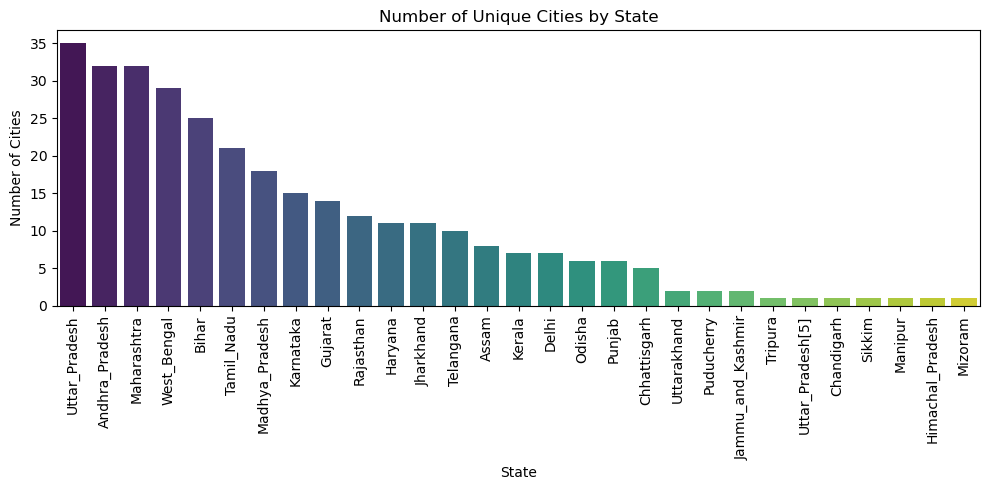

In [25]:
# Aggregate cities by state
city_state_counts = df.groupby('STATE')['CITY'].nunique().sort_values(ascending=False)

# Plot aggregated counts
plt.figure(figsize=(10, 5))
sns.barplot(x=city_state_counts.index, y=city_state_counts.values, palette='viridis')
plt.xlabel('State')
plt.ylabel('Number of Cities')
plt.title('Number of Unique Cities by State')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

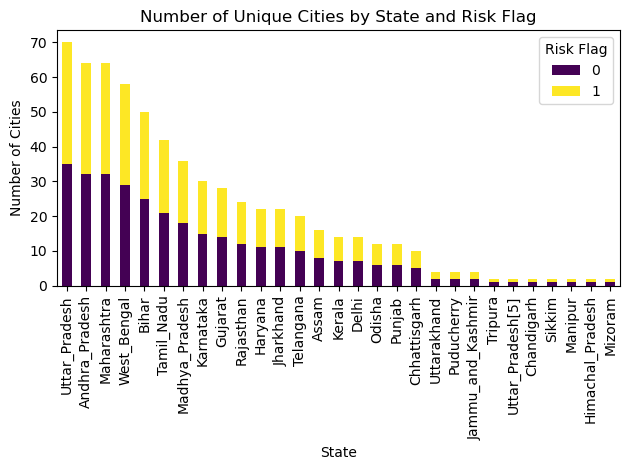

In [26]:
# Aggregate cities by state and risk flag
city_state_risk_counts_sorted = df.groupby(['STATE', 'Risk_Flag'])['CITY'].nunique().unstack().assign(total=lambda x: x.sum(axis=1)).sort_values(by='total', ascending=False)
city_state_risk_counts=city_state_risk_counts_sorted.drop(columns=['total'])
# Plot aggregated counts
plt.figure(figsize=(12, 6))
city_state_risk_counts.plot(kind='bar', stacked=True, colormap='viridis')
plt.xlabel('State')
plt.ylabel('Number of Cities')
plt.title('Number of Unique Cities by State and Risk Flag')
plt.xticks(rotation=90)
plt.legend(title='Risk Flag')
plt.tight_layout()
plt.show()

1. Income & age are uniformally distributed & no outlier present
2. The exploratory data analysis (EDA) reveals a prevalent class imbalance in variables such as "Risk_Flag," "Marital Status," and "House_Ownership," highlighting a common trend of majority instances in low-risk categories, single individuals, and renters, respectively.

# feature Scaling

In [27]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Profession'] = le.fit_transform(df['Profession'])
df['CITY'] = le.fit_transform(df['CITY'])
df['STATE'] = le.fit_transform(df['STATE'])

In [28]:
# One Hot Encoding
df = pd.get_dummies(df, drop_first=True)
df.head()

,Income,Age,Experience,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,Marital_status_single,House_Ownership_owned,House_Ownership_rented,Car_Ownership_yes
0,1303834,23,3,33,251,13,3,13,0,1,0,1,0
1,7574516,40,10,43,227,14,9,13,0,1,0,1,0
2,3991815,66,4,47,8,12,4,10,0,0,0,1,0
3,6256451,41,2,43,54,17,2,12,1,1,0,1,1
4,5768871,47,11,11,296,22,3,14,1,1,0,1,0


In [29]:
# one hot encoding for nominal data
#dummies=pd.get_dummies(X_train[['Marital_status','House_Ownership','Car_Ownership']],drop_first=True)
#X_train=pd.concat([X_train,dummies],axis="columns")
#X_train=X_train.drop(columns=['Marital_status','House_Ownership','Car_Ownership'])
#X_train.head()

# Train-Test Split

In [30]:
X = df.drop(["Risk_Flag"],axis=1)
y = df["Risk_Flag"]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(201600, 12) (50400, 12)
(201600,) (50400,)


In [31]:
# Normlization
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler().fit(X_train)
X_train_norm=pd.DataFrame(norm.transform(X_train),index=X_train.index, columns=X_train.columns)
X_train_norm.head()

,Income,Age,Experience,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Marital_status_single,House_Ownership_owned,House_Ownership_rented,Car_Ownership_yes
200471,0.912051,0.844828,0.90,0.08,0.854430,0.714286,0.214286,0.25,1.0,0.0,1.0,0.0
92611,0.262896,0.310345,0.00,0.26,0.984177,0.785714,0.000000,0.25,1.0,0.0,1.0,0.0
86397,0.100127,0.310345,0.45,0.84,0.389241,0.821429,0.285714,0.75,1.0,0.0,1.0,0.0
110500,0.389116,0.000000,0.10,0.96,0.933544,0.035714,0.142857,0.50,1.0,0.0,1.0,0.0
185133,0.946972,0.344828,0.25,1.00,0.177215,0.392857,0.357143,0.75,1.0,0.0,0.0,1.0


# Feature Selection

In [32]:
data = pd.concat([X_train_norm, y_train], axis=1)
data.corr()

,Income,Age,Experience,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Marital_status_single,House_Ownership_owned,House_Ownership_rented,Car_Ownership_yes,Risk_Flag
Income,1.000000,-0.002466,0.008273,0.000553,-0.002330,-0.006887,0.008356,-0.003107,0.003193,0.001680,0.011155,0.003712,-0.002447
Age,-0.002466,1.000000,-0.000095,-0.008217,0.002690,-0.004538,0.002961,-0.018993,-0.006075,0.017387,-0.013377,0.007792,-0.018032
Experience,0.008273,-0.000095,1.000000,0.000055,-0.026464,-0.000633,0.644987,0.018932,-0.002599,0.014209,-0.011364,0.008769,-0.035569
Profession,0.000553,-0.008217,0.000055,1.000000,0.018251,0.000581,-0.004643,0.000330,-0.007818,-0.010184,0.005536,0.011780,-0.006362
CITY,-0.002330,0.002690,-0.026464,0.018251,1.000000,-0.038217,-0.027255,-0.009860,0.012715,0.012001,-0.014917,0.000923,0.005170
STATE,-0.006887,-0.004538,-0.000633,0.000581,-0.038217,1.000000,0.008471,0.006612,-0.009693,0.020623,-0.013333,0.026765,-0.003986
CURRENT_JOB_YRS,0.008356,0.002961,0.644987,-0.004643,-0.027255,0.008471,1.000000,0.005821,0.004809,0.007610,-0.010560,0.012800,-0.017006
CURRENT_HOUSE_YRS,-0.003107,-0.018993,0.018932,0.000330,-0.009860,0.006612,0.005821,1.000000,-0.006836,0.015542,-0.009812,0.000555,-0.004627
Marital_status_single,0.003193,-0.006075,-0.002599,-0.007818,0.012715,-0.009693,0.004809,-0.006836,1.000000,0.023850,-0.024656,-0.000259,0.021842
House_Ownership_owned,0.001680,0.017387,0.014209,-0.010184,0.012001,0.020623,0.007610,0.015542,0.023850,1.000000,-0.788453,0.002761,-0.023179


<Axes: >

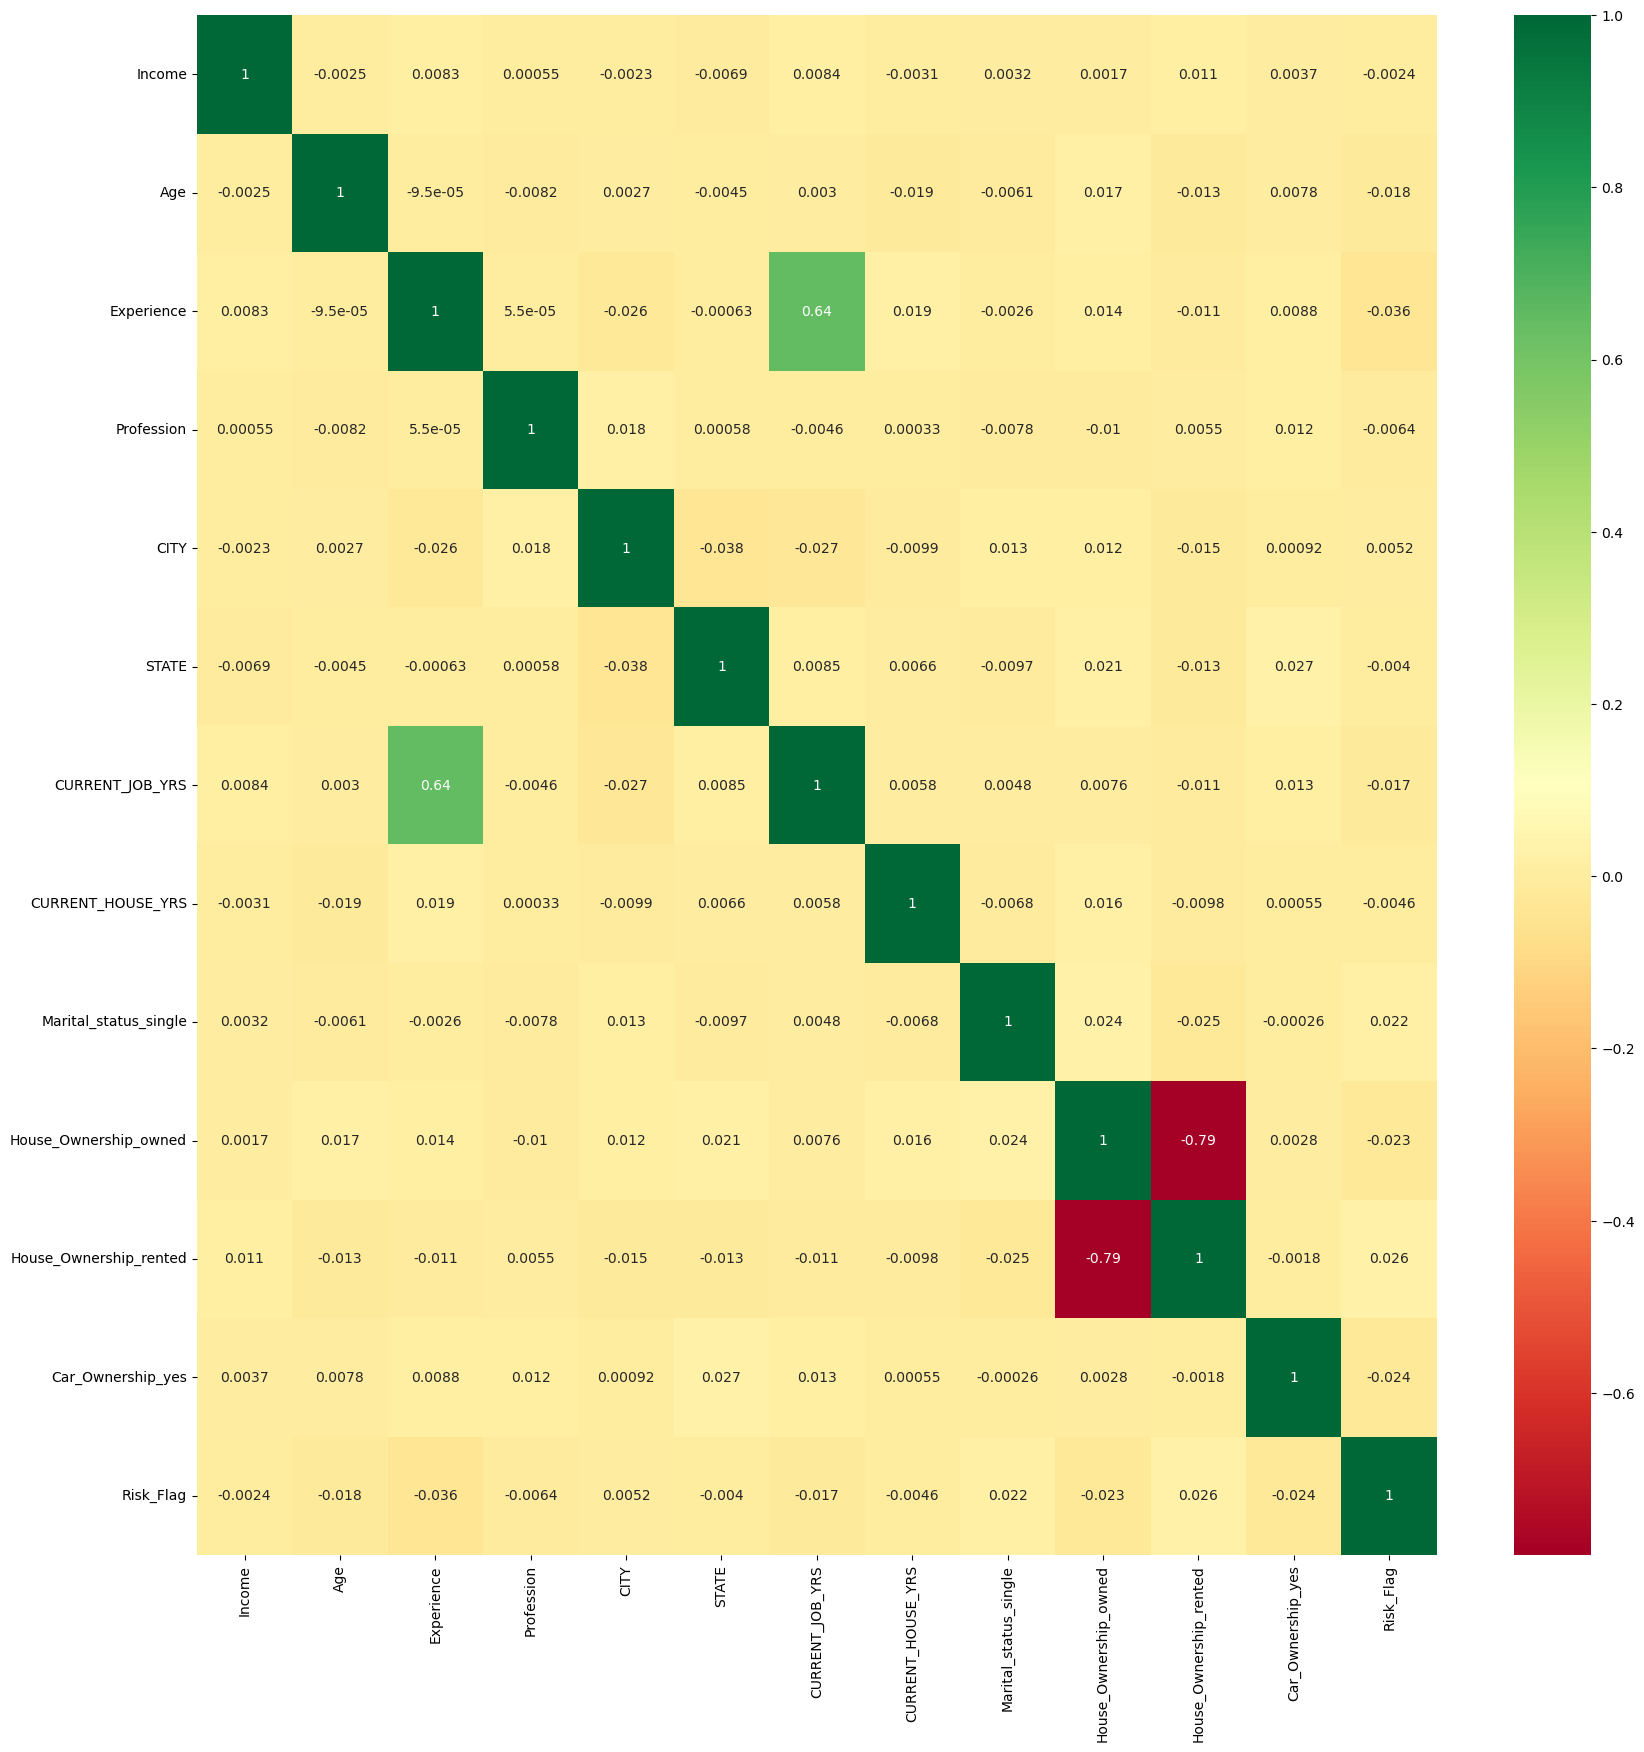

In [33]:
corrmat= data.corr()
top_corr_features= corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

Now the variables (which are least correlated with target variable) i.e whose correlation with the target variable is between -0.01 and 0.01 we will consider those variables to be removed from our data. 

In [34]:
# Correlation-Based Feature Selection
def correlation_feature_selection(X_train_norm, y_train):
    correlations = X_train_norm.corrwith(y_train)
    selected_features = correlations[(correlations < -0.02) | (correlations > 0.02)].index.tolist()
    return correlations, selected_features
corr, selected_features_corr = correlation_feature_selection(X_train_norm, y_train)
print(corr.sort_values(ascending=False))
print("\033[1mCorrelation Feature Selection\033[0m:", selected_features_corr)

House_Ownership_rented    0.025827
Marital_status_single     0.021842
CITY                      0.005170
Income                   -0.002447
STATE                    -0.003986
CURRENT_HOUSE_YRS        -0.004627
Profession               -0.006362
CURRENT_JOB_YRS          -0.017006
Age                      -0.018032
House_Ownership_owned    -0.023179
Car_Ownership_yes        -0.023798
Experience               -0.035569
dtype: float64
Correlation Feature Selection: ['Experience', 'Marital_status_single', 'House_Ownership_owned', 'House_Ownership_rented', 'Car_Ownership_yes']


In [35]:
# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calculate_vif(X):
    # Calculate VIF for each feature
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data
# Call the function to calculate VIF for independent variables
calculate_vif(X_train_norm).sort_values(by='VIF',ascending=False)

,Feature,VIF
10,House_Ownership_rented,15.596888
8,Marital_status_single,8.377359
6,CURRENT_JOB_YRS,6.796901
2,Experience,6.503444
0,Income,3.842598
3,Profession,3.764492
4,CITY,3.748792
1,Age,3.704013
5,STATE,3.062002
7,CURRENT_HOUSE_YRS,2.942678


1. Features "House_Ownership_rented" and "Marital_status_single" have high VIF values of 15.60 and 8.38, respectively. showing high multicollinearity with other features in the dataset.
2. Features "CURRENT_JOB_YRS" & "Experience" have VIF Values of 6.80 & 6.50 respectively showing moderate multicolinearity
2. Other features have VIF values below 5, suggesting relatively low multicollinearity.

In [36]:
# Variance Thresholding
from sklearn.feature_selection import VarianceThreshold

def variance_threshold_selection(X_train_norm, threshold):
    selector = VarianceThreshold(threshold=threshold)
    selector.fit(X_train_norm)
    selected_features_indices = selector.get_support(indices=True)
    selected_features = X_train_norm.columns[selected_features_indices].tolist()
    variance_values = X_train_norm.var().tolist()  # Calculate variance for each variable
    return selected_features, variance_values
selected_features, variance_values = variance_threshold_selection(X_train_norm, threshold=0.1)
# Print selected features
print("\033[1mVariance Threshold Feature Selection\033[0m:")
print(pd.DataFrame({"Feature": X_train_norm.columns, "Variance": variance_values}).sort_values(by='Variance',ascending=False))
print("\nSelected Features:", selected_features)

Variance Threshold Feature Selection:
                   Feature  Variance
11       Car_Ownership_yes  0.210689
7        CURRENT_HOUSE_YRS  0.122288
5                    STATE  0.112098
8    Marital_status_single  0.091927
2               Experience  0.090024
3               Profession  0.086691
1                      Age  0.086685
4                     CITY  0.085093
0                   Income  0.083157
10  House_Ownership_rented  0.073146
6          CURRENT_JOB_YRS  0.067834
9    House_Ownership_owned  0.048334

Selected Features: ['STATE', 'CURRENT_HOUSE_YRS', 'Car_Ownership_yes']


In [37]:
# Chi2 Squre
from sklearn.feature_selection import chi2

def chi_square_selection(X_train_norm, y_train, alpha=0.05):
    chi2_scores, p_values = chi2(X_train_norm, y_train)
    selected_features = X_train_norm.columns[p_values < alpha].tolist()
    return chi2_scores, p_values, selected_features

# Call the function to perform Chi-Square feature selection
chi2_scores, p_values, selected_features = chi_square_selection(X_train_norm, y_train)

# Print Chi-Square scores and p-values
print("\033[1mChi-Square Feature Selection\033[0m:")
print(pd.DataFrame({"Feature": X_train_norm.columns, "Chi-Square Scores:": chi2_scores,"p_Values:": p_values}).sort_values(by='Chi-Square Scores:',ascending=False))
# Print selected features
print("\nSelected Features:", selected_features)

Chi-Square Feature Selection:
                   Feature  Chi-Square Scores:     p_Values:
9    House_Ownership_owned          102.797657  3.711884e-24
11       Car_Ownership_yes           79.728245  4.296150e-19
2               Experience           45.529208  1.503795e-11
1                      Age           11.359315  7.507050e-04
10  House_Ownership_rented           10.684977  1.080091e-03
8    Marital_status_single            9.849853  1.698453e-03
6          CURRENT_JOB_YRS            8.742878  3.108136e-03
3               Profession            1.399370  2.368292e-01
7        CURRENT_HOUSE_YRS            1.057219  3.038503e-01
4                     CITY            0.916720  3.383376e-01
5                    STATE            0.728246  3.934523e-01
0                   Income            0.200867  6.540221e-01

Selected Features: ['Age', 'Experience', 'CURRENT_JOB_YRS', 'Marital_status_single', 'House_Ownership_owned', 'House_Ownership_rented', 'Car_Ownership_yes']


In [38]:
# ANOVA Feature Selection
from sklearn.feature_selection import f_classif
def anova_selection(X_train_norm, y_train, alpha=0.05):
    f_scores, p_values = f_classif(X_train_norm, y_train)
    selected_features = X_train_norm.columns[p_values < alpha].tolist()
    return f_scores, p_values, selected_features
f_scores, p_values,selected_features = anova_selection(X_train_norm, y_train)
print("\033[1mANOVA Feature Selection\033[0m:")
print(pd.DataFrame({"Feature": X_train_norm.columns, "f_scores": f_scores,"p_values": p_values}).sort_values(by='f_scores',ascending=False))
print("\nSelected Features:", selected_features)

ANOVA Feature Selection:
                   Feature    f_scores      p_values
2               Experience  255.377571  1.894515e-57
10  House_Ownership_rented  134.559451  4.216880e-31
11       Car_Ownership_yes  114.242627  1.172147e-26
9    House_Ownership_owned  108.370967  2.262284e-25
8    Marital_status_single   96.220196  1.040023e-22
1                      Age   65.570938  5.636809e-16
6          CURRENT_JOB_YRS   58.319116  2.238419e-14
3               Profession    8.160826  4.280925e-03
4                     CITY    5.388817  2.026720e-02
7        CURRENT_HOUSE_YRS    4.315660  3.776437e-02
5                    STATE    3.202353  7.353392e-02
0                   Income    1.206692  2.719895e-01

Selected Features: ['Age', 'Experience', 'Profession', 'CITY', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Marital_status_single', 'House_Ownership_owned', 'House_Ownership_rented', 'Car_Ownership_yes']


In [39]:
# Mutual Information Feature Selection
from sklearn.feature_selection import mutual_info_classif
def mutual_information_selection(X_train_norm, y_train, n_features=None):
    mi_scores = mutual_info_classif(X_train_norm, y_train)
    selected_features_indices = mi_scores.argsort()[-n_features:][::-1] if n_features else mi_scores.argsort()[::-1]
    selected_features = X_train_norm.columns[selected_features_indices].tolist()
    return mi_scores, selected_features
mi_scores, selected_features = mutual_information_selection(X_train_norm, y_train, n_features=5)
print("\033[1mMutual Information Feature Selection\033[0m:")
print(pd.DataFrame({"Feature": X_train_norm.columns, "mi_scores": mi_scores}).sort_values(by='mi_scores',ascending=False))
print("\nSelected Features:", selected_features)

Mutual Information Feature Selection:
                   Feature  mi_scores
0                   Income   0.161346
8    Marital_status_single   0.028045
10  House_Ownership_rented   0.025817
11       Car_Ownership_yes   0.009496
4                     CITY   0.008648
7        CURRENT_HOUSE_YRS   0.008017
5                    STATE   0.004637
6          CURRENT_JOB_YRS   0.003801
2               Experience   0.003215
3               Profession   0.002963
1                      Age   0.002173
9    House_Ownership_owned   0.000982

Selected Features: ['Income', 'Marital_status_single', 'House_Ownership_rented', 'Car_Ownership_yes', 'CITY']


In [40]:
# Random Forest Feature Selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
def random_forest_feature_selection(X_train_norm, y_train):
    clf = RandomForestClassifier(n_estimators=100)
    clf.fit(X_train_norm, y_train)
    feature_importances = clf.feature_importances_
    model = SelectFromModel(clf, prefit=True)
    selected_features = X_train_norm.columns[model.get_support()].tolist()
    return feature_importances, selected_features
feature_importances, selected_features = random_forest_feature_selection(X_train_norm, y_train)
print("\033[1mRandom Forest Feature Selection\033[0m:")
print(pd.DataFrame({"Feature": X_train_norm.columns, "feature_importances": feature_importances}).sort_values(by='feature_importances',ascending=False))
print("\nSelected Features:", selected_features)

Random Forest Feature Selection:
                   Feature  feature_importances
0                   Income             0.190311
4                     CITY             0.163699
3               Profession             0.145235
1                      Age             0.143996
5                    STATE             0.102932
2               Experience             0.082106
6          CURRENT_JOB_YRS             0.075318
7        CURRENT_HOUSE_YRS             0.064931
11       Car_Ownership_yes             0.013555
8    Marital_status_single             0.009290
10  House_Ownership_rented             0.005716
9    House_Ownership_owned             0.002910

Selected Features: ['Income', 'Age', 'Profession', 'CITY', 'STATE']


In [41]:
# Lasso Feature Selection
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
def lasso_feature_selection(X_train_norm, y_train, C=1.0):
    clf = LogisticRegression(penalty='l1', C=C, solver='liblinear')
    clf.fit(X_train_norm, y_train)
    coefficients = clf.coef_[0]
    model = SelectFromModel(clf, prefit=True)
    selected_features = X_train_norm.columns[model.get_support()].tolist()
    return coefficients, selected_features
coefficients, selected_features = lasso_feature_selection(X_train_norm, y_train)
print("\033[1mLasso Feature Selection\033[0m:")
print(pd.DataFrame({"Feature": X_train_norm.columns, "coefficients": coefficients}).sort_values(by='coefficients',ascending=False))
print("\nSelected Features:", selected_features)

Lasso Feature Selection:
                   Feature  coefficients
10  House_Ownership_rented      0.240236
8    Marital_status_single      0.236258
6          CURRENT_JOB_YRS      0.135842
4                     CITY      0.046331
5                    STATE     -0.026381
0                   Income     -0.026727
7        CURRENT_HOUSE_YRS     -0.032175
3               Profession     -0.065732
9    House_Ownership_owned     -0.125233
11       Car_Ownership_yes     -0.158911
1                      Age     -0.181864
2               Experience     -0.433890

Selected Features: ['Income', 'Age', 'Experience', 'Profession', 'CITY', 'STATE', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Marital_status_single', 'House_Ownership_owned', 'House_Ownership_rented', 'Car_Ownership_yes']


In [42]:
# Recursive Feature Elimination (RFE) Feature Selection
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
def rfe_feature_selection(X_train_norm, y_train, n_features_to_select=None):
    clf = LogisticRegression()
    rfe = RFE(estimator=clf, n_features_to_select=n_features_to_select)
    rfe.fit(X_train_norm, y_train)
    feature_ranking = rfe.ranking_
    selected_features = X_train_norm.columns[rfe.support_].tolist()
    return feature_ranking, selected_features
feature_ranking, selected_features = rfe_feature_selection(X_train_norm, y_train, n_features_to_select=5)

# Print the RFE feature selection results
print("\033[1mRFE Feature Selection\033[0m:")
print(pd.DataFrame({"Feature": X_train_norm.columns, "Ranking": feature_ranking}).sort_values(by='Ranking',ascending=True))
print(selected_features)

RFE Feature Selection:
                   Feature  Ranking
1                      Age        1
2               Experience        1
8    Marital_status_single        1
10  House_Ownership_rented        1
11       Car_Ownership_yes        1
6          CURRENT_JOB_YRS        2
9    House_Ownership_owned        3
3               Profession        4
4                     CITY        5
7        CURRENT_HOUSE_YRS        6
0                   Income        7
5                    STATE        8
['Age', 'Experience', 'Marital_status_single', 'House_Ownership_rented', 'Car_Ownership_yes']


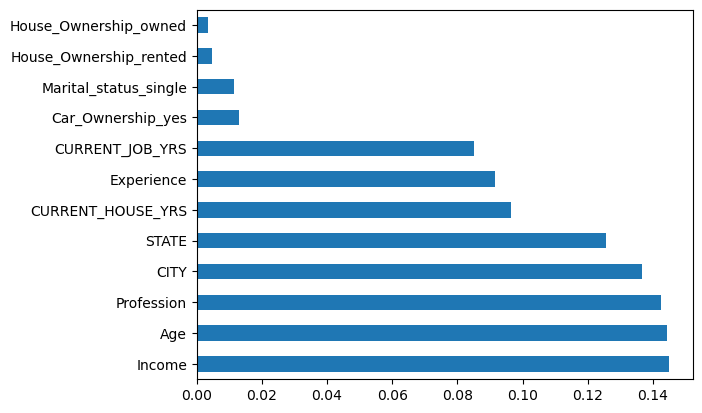

In [43]:
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(X_train_norm,y_train)
feat_imp =pd.Series(model.feature_importances_, index=X_train_norm.columns)
feat_imp.nlargest(30).plot(kind='barh')
plt.rcParams['figure.figsize']=(10,7)
plt.show()

For all the feature selection techniques applied above, there are few features that regularly showed up to be removed from our data hence we remove the following 3 less useful variables:
1. House_Ownership_rented
2. Marital_status_single
3. CURRENT_JOB_YRS

In [44]:
X_train_norm.drop(columns=['House_Ownership_rented','Marital_status_single','CURRENT_JOB_YRS'],inplace=True)
X_train_norm.head()

,Income,Age,Experience,Profession,CITY,STATE,CURRENT_HOUSE_YRS,House_Ownership_owned,Car_Ownership_yes
200471,0.912051,0.844828,0.90,0.08,0.854430,0.714286,0.25,0.0,0.0
92611,0.262896,0.310345,0.00,0.26,0.984177,0.785714,0.25,0.0,0.0
86397,0.100127,0.310345,0.45,0.84,0.389241,0.821429,0.75,0.0,0.0
110500,0.389116,0.000000,0.10,0.96,0.933544,0.035714,0.50,0.0,0.0
185133,0.946972,0.344828,0.25,1.00,0.177215,0.392857,0.75,0.0,1.0


# Model Building

In [45]:
print(X_train_norm.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(201600, 9) (50400, 12)
(201600,) (50400,)


In [46]:
# Normlization
X_test_norm = pd.DataFrame(norm.transform(X_test), index=X_test.index, columns=X_test.columns)
X_test_norm.drop(columns=['House_Ownership_rented','Marital_status_single','CURRENT_JOB_YRS'],inplace=True)
X_test_norm.head()

,Income,Age,Experience,Profession,CITY,STATE,CURRENT_HOUSE_YRS,House_Ownership_owned,Car_Ownership_yes
75255,0.425508,0.448276,0.90,0.78,0.373418,0.000000,0.75,0.0,0.0
192435,0.852788,0.396552,0.10,0.26,0.664557,0.000000,0.00,0.0,0.0
154839,0.784648,0.586207,0.45,0.86,0.724684,0.071429,0.75,0.0,0.0
59774,0.848999,0.689655,1.00,0.24,0.360759,1.000000,0.25,0.0,0.0
63788,0.152854,0.982759,0.65,1.00,0.231013,0.785714,0.50,0.0,0.0


# 1) Logistic Regression

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
LR = LogisticRegression(C=0.01,solver='liblinear').fit(X_train_norm,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [48]:
print(classification_report(y_train, LR.predict(X_train_norm),zero_division=0))
confusion_matrix(y_train,LR.predict(X_train_norm))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93    176857
           1       0.00      0.00      0.00     24743

    accuracy                           0.88    201600
   macro avg       0.44      0.50      0.47    201600
weighted avg       0.77      0.88      0.82    201600



array([[176857,      0],
       [ 24743,      0]], dtype=int64)

In [49]:
yLR = LR.predict(X_test_norm)
yLR_prob = LR.predict_proba(X_test_norm)
print(yLR)
print(yLR_prob)
print(yLR_prob[:,1])
pd.crosstab(y_test,yLR)

[0 0 0 ... 0 0 0]
[[0.88632056 0.11367944]
 [0.84182471 0.15817529]
 [0.87512031 0.12487969]
 ...
 [0.86143355 0.13856645]
 [0.9036561  0.0963439 ]
 [0.8707607  0.1292393 ]]
[0.11367944 0.15817529 0.12487969 ... 0.13856645 0.0963439  0.1292393 ]


col_0,0
Risk_Flag,
0,44147
1,6253


In [50]:
pd.crosstab(y_test,yLR)

col_0,0
Risk_Flag,
0,44147
1,6253


In [51]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import numpy as np

def model_evaluation(model, threshold=0.5):
    y_pred_prob = model.predict_proba(X_test_norm)[:, 1]
    y_pred = (y_pred_prob > threshold).astype(int)
    
    cm = confusion_matrix(y_test, y_pred)
    cm_matrix = pd.DataFrame({'Actual Positive:1': [cm[1, 1], cm[1, 0]], 'Actual Negative:0': [cm[0, 1], cm[0, 0]]},
                             index=['Predict Positive:1', 'Predict Negative:0'])
    print(classification_report(y_test, y_pred, zero_division=0))
    plt.figure(figsize=(2, 2))
    sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Blues')
    TP = cm[1, 1]
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]   
    accuracy = (TP + TN) / (TP + TN + FP + FN) if (TP + TN + FP + FN) != 0 else np.nan
    precision = TP / (TP + FP) if (TP + FP) != 0 else np.nan
    recall = TP / (TP + FN) if (TP + FN) != 0 else np.nan
    classification_error = (FP + FN) / float(TP + TN + FP + FN) if (TP + TN + FP + FN) != 0 else np.nan    
    print('accuracy: ', accuracy)
    print('precision: ', precision)
    print('recall: ', recall)
    print('classification_error', classification_error)  
    print(pd.DataFrame({'counts': [TP, TN, FP, FN]}, index=['TP', 'TN', 'FP', 'FN']))
    plt.show()
    print("\n","\n")

# Example usage:
# model_evaluation(model, threshold=0.7)  # Adjust threshold as needed

              precision    recall  f1-score   support

           0       0.88      1.00      0.93     44147
           1       0.00      0.00      0.00      6253

    accuracy                           0.88     50400
   macro avg       0.44      0.50      0.47     50400
weighted avg       0.77      0.88      0.82     50400

accuracy:  0.8759325396825397
precision:  nan
recall:  0.0
classification_error 0.12406746031746031
    counts
TP       0
TN   44147
FP       0
FN    6253


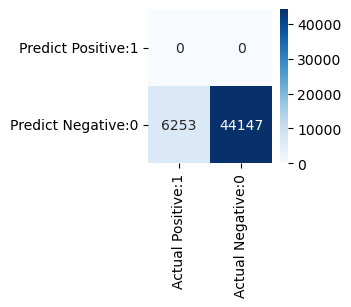

In [52]:
model_evaluation(LR,0.5)

# Since our target is imbalanced i.e the number of applicant who are risk for giving loan is pretty less than the applicant no_risk of giving loan, We will use Precision recall curve.

In [53]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

def plot_precision_recall_curve(y_true, y_scores):
    precision, recall, thresholds = precision_recall_curve(y_true, y_scores[:, 1])
    pr_auc = auc(recall, precision)
    
    f1_scores = 2 * (precision * recall) / (precision + recall)
    optimal_threshold_index = np.argmax(f1_scores)
    optimal_threshold = thresholds[optimal_threshold_index]
    
    # Print the optimum threshold along with its corresponding precision and recall
    print("Optimum Threshold:", optimal_threshold)
    print("Corresponding Precision:", precision[optimal_threshold_index])
    print("Corresponding Recall:", recall[optimal_threshold_index])
    
    plt.figure()
    plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve (AUC = %0.2f)' % pr_auc)
    plt.scatter(recall[optimal_threshold_index], precision[optimal_threshold_index], color='red', marker='o', label='Optimum Threshold')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc="lower left")
    plt.show()

    return precision, recall, thresholds, optimal_threshold, pr_auc

# Example usage:
# precision, recall, thresholds, optimal_threshold, pr_auc = plot_precision_recall_curve(y_test, yLR_prob)

In [54]:
from sklearn.metrics import roc_curve, auc, precision_score, recall_score

def plot_roc_curve(y_true, y_scores):
    fpr, tpr, thresholds = roc_curve(y_true, y_scores[:, 1])
    roc_auc = auc(fpr, tpr)
    
    # Calculate Youden's index for each threshold
    youden_index = tpr - fpr
    
    # Find the index of the threshold that maximizes Youden's index
    optimal_threshold_index = np.argmax(youden_index)
    
    # Select the optimum threshold
    optimal_threshold = thresholds[optimal_threshold_index]
    
    # Get the corresponding predicted labels for the optimum threshold
    y_pred_optimal = (y_scores[:, 1] > optimal_threshold).astype(int)
    
    # Calculate precision and recall for the optimum threshold
    precision_optimal = precision_score(y_true, y_pred_optimal)
    recall_optimal = recall_score(y_true, y_pred_optimal)
    
    # Print the optimum threshold along with its corresponding TPR, FPR, precision, and recall
    print("Optimum Threshold:", optimal_threshold)
    print("Corresponding TPR:", tpr[optimal_threshold_index])
    print("Corresponding FPR:", fpr[optimal_threshold_index])
    print("Corresponding Precision:", precision_optimal)
    print("Corresponding Recall:", recall_optimal)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.scatter(fpr[optimal_threshold_index], tpr[optimal_threshold_index], color='red', marker='o', label='Optimum Threshold')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds, optimal_threshold, roc_auc

# Example usage:
# fpr, tpr, thresholds, optimal_threshold, roc_auc = plot_roc_curve(y_test, yhat_prob)

Optimum Threshold: 0.17600141064917577
Corresponding Precision: 0.0
Corresponding Recall: 0.0


C:\Users\Dinesh Ayare\AppData\Local\Temp\ipykernel_14264\2126910759.py:8: RuntimeWarning: invalid value encountered in divide
  f1_scores = 2 * (precision * recall) / (precision + recall)


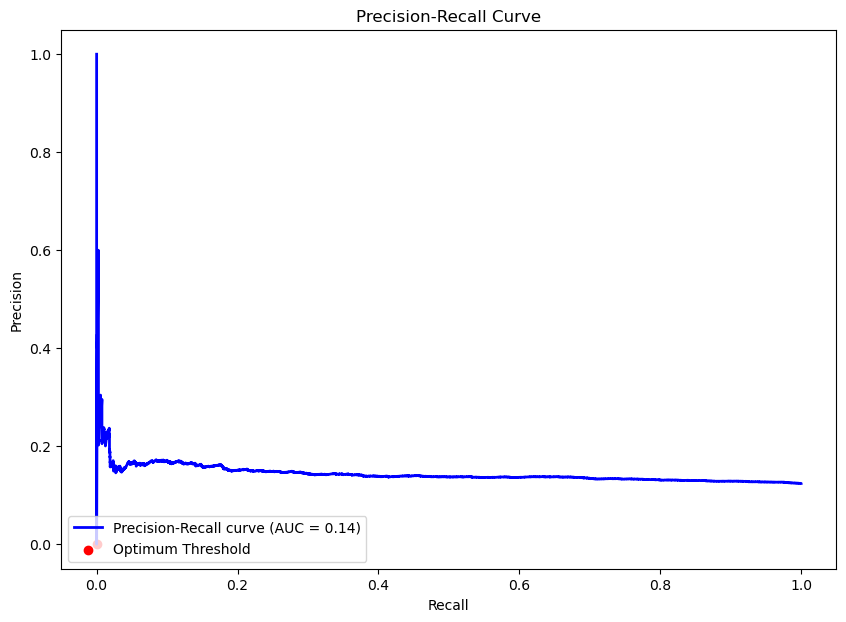

In [55]:
precision, recall, thresholds, optimal_threshold, pr_auc = plot_precision_recall_curve(y_test, yLR_prob)

Optimum Threshold: 0.11918180849644541
Corresponding TPR: 0.6532864225171917
Corresponding FPR: 0.5779781185584525
Corresponding Precision: 0.13791472396783566
Corresponding Recall: 0.6528066528066528


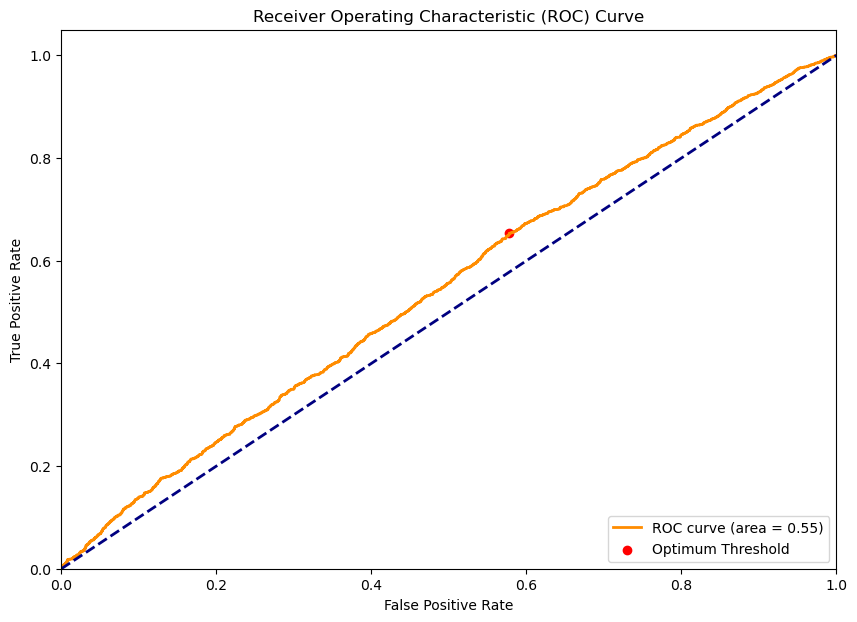

In [56]:
fpr, tpr, thresholds, optimal_threshold, roc_auc = plot_roc_curve(y_test, yLR_prob)

              precision    recall  f1-score   support

           0       0.90      0.24      0.38     44147
           1       0.13      0.81      0.23      6253

    accuracy                           0.31     50400
   macro avg       0.51      0.52      0.30     50400
weighted avg       0.80      0.31      0.36     50400

accuracy:  0.3107738095238095
precision:  0.1310745000518081
recall:  0.8092115784423477
classification_error 0.6892261904761905
    counts
TP    5060
TN   10603
FP   33544
FN    1193


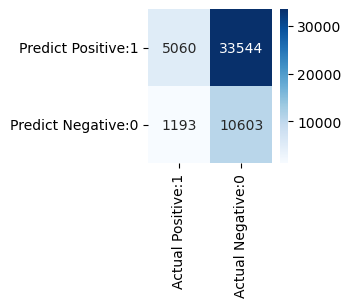

In [57]:
model_evaluation(LR,0.11)

# 2) Random Forest

In [58]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100).fit(X_train_norm,y_train)
print(rf)
confusion_matrix(y_train,rf.predict(X_train_norm))

RandomForestClassifier()


array([[168763,   8094],
       [  4728,  20015]], dtype=int64)

In [59]:
yrf = rf.predict(X_test_norm)
yrf

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

              precision    recall  f1-score   support

           0       1.00      0.79      0.88     44147
           1       0.40      0.98      0.57      6253

    accuracy                           0.82     50400
   macro avg       0.70      0.89      0.73     50400
weighted avg       0.92      0.82      0.85     50400

accuracy:  0.817936507936508
precision:  0.4038423580498717
recall:  0.9816088277626739
classification_error 0.18206349206349207
    counts
TP    6138
TN   35086
FP    9061
FN     115


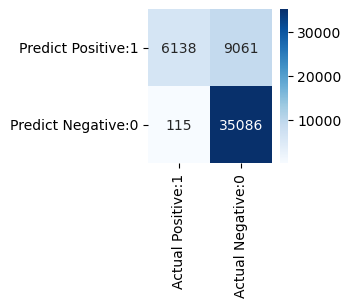

In [60]:
model_evaluation(rf,0.11)

# SMOTE (Synthetic Minority Over-sampling Technique)

In [73]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority',random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_norm,y_train)
from collections import Counter
print("Before SMOTE :" , Counter(y_train))
print("After SMOTE :" , Counter(y_train_smote))

Before SMOTE : Counter({0: 176857, 1: 24743})
After SMOTE : Counter({0: 176857, 1: 176857})


# 1) Logitstic Regression Smote

In [74]:
LRSMOTE = LogisticRegression(C=0.01,solver='liblinear').fit(X_train_smote, y_train_smote)
print(LRSMOTE)
confusion_matrix(y_train_smote,LRSMOTE.predict(X_train_smote))

LogisticRegression(C=0.01, solver='liblinear')


array([[89737, 87120],
       [79333, 97524]], dtype=int64)

In [75]:
yLRSMOTE = LRSMOTE.predict(X_test_norm)
print(yLRSMOTE)

yLRSMOTE_prob = LRSMOTE.predict_proba(X_test_norm)
print(yLRSMOTE_prob[:,1])

[0 1 1 ... 1 0 1]
[0.4794742  0.56225371 0.51157888 ... 0.53458209 0.44017344 0.51803831]


              precision    recall  f1-score   support

           0       0.89      0.50      0.64     44147
           1       0.14      0.55      0.22      6253

    accuracy                           0.51     50400
   macro avg       0.51      0.53      0.43     50400
weighted avg       0.80      0.51      0.59     50400

accuracy:  0.5102777777777778
precision:  0.13658055610333267
recall:  0.5538141691987846
classification_error 0.4897222222222222
    counts
TP    3463
TN   22255
FP   21892
FN    2790


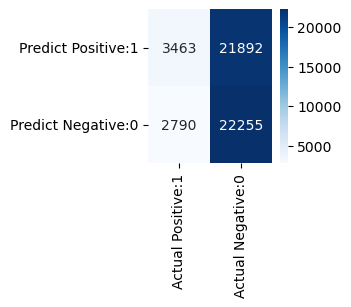

In [76]:
pd.crosstab(y_test,yLRSMOTE)
model_evaluation(LRSMOTE)

# 2) Random Forest SMOTE

In [77]:
rfsmote = RandomForestClassifier(n_estimators=100).fit(X_train_smote, y_train_smote)
print(rfsmote)
confusion_matrix(y_train_smote,LRSMOTE.predict(X_train_smote))

RandomForestClassifier()


array([[89737, 87120],
       [79333, 97524]], dtype=int64)

[0 0 0 ... 1 0 0]
[[1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 ...
 [0.10024723 0.89975277]
 [1.         0.        ]
 [0.5921978  0.4078022 ]]
              precision    recall  f1-score   support

           0       0.97      0.91      0.94     44147
           1       0.54      0.78      0.64      6253

    accuracy                           0.89     50400
   macro avg       0.75      0.84      0.79     50400
weighted avg       0.91      0.89      0.90     50400

accuracy:  0.8905555555555555
precision:  0.5409126235150439
recall:  0.7791460099152406
classification_error 0.10944444444444444
    counts
TP    4872
TN   40012
FP    4135
FN    1381


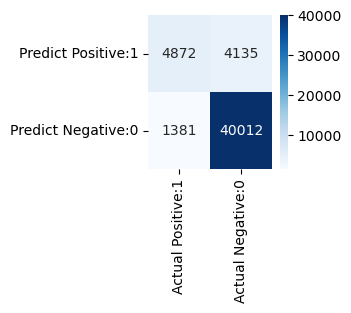

In [78]:
yrfsmote = rfsmote.predict(X_test_norm)
print(yrfsmote)
yrfsmote_prob = rfsmote.predict_proba(X_test_norm)
print(yrfsmote_prob)
model_evaluation(rfsmote)

Optimum Threshold: 0.6857423722722163
Corresponding Precision: 0.560681334279631
Corresponding Recall: 0.7580361426515273


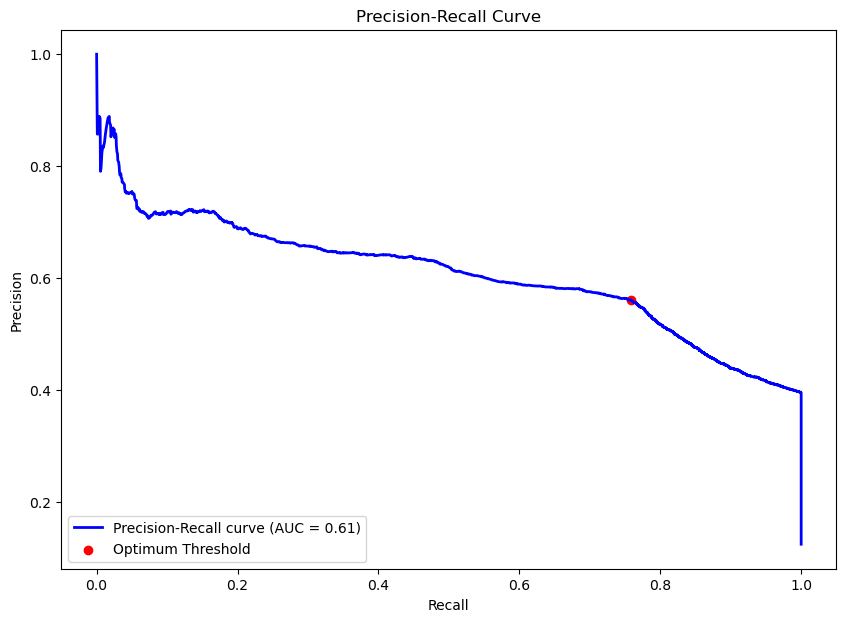

In [79]:
pr_auc_score = plot_precision_recall_curve(y_test,yrfsmote_prob)

Optimum Threshold: 0.09
Corresponding TPR: 1.0
Corresponding FPR: 0.21695698461956645
Corresponding Precision: 0.3949829394667004
Corresponding Recall: 0.9996801535263073


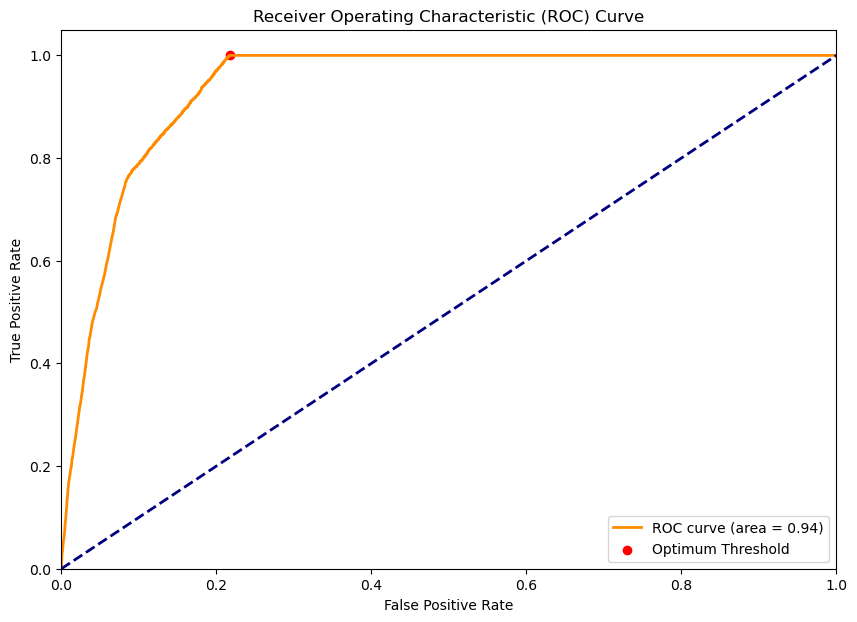

In [80]:
fpr, tpr, thresholds, optimal_threshold, roc_auc = plot_roc_curve(y_test, yrfsmote_prob)

# Random forest(smote) model is best fitted model for Loan Risk Analysis
since, it gives Accuracy = 0.89, precision:  0.55 , recall:  0.77 & classification_error 0.11 which is minimum compared with logistic model(smote)
1. from Precision recall curve we say that for thresold = 0.7 both precision & recall is maximum
2. from ROC curve for thresold = 0.09 recall is maximum & precision is minimum (false negative is minimum-wrongly predicted positive(risk))

In [81]:
yrfsomte_new_threshold = (rfsmote.predict_proba(X_test_norm)[:, 1] >= 0.09).astype(int) 
print(classification_report(y_test, yrfsomte_new_threshold,zero_division=0))
pd.crosstab(y_test,yrfsomte_new_threshold)

              precision    recall  f1-score   support

           0       1.00      0.78      0.88     44147
           1       0.39      1.00      0.57      6253

    accuracy                           0.81     50400
   macro avg       0.70      0.89      0.72     50400
weighted avg       0.92      0.81      0.84     50400



col_0,0,1
Risk_Flag,,
0,34569,9578
1,0,6253


In [82]:
from sklearn.metrics import roc_curve, auc, precision_score, recall_score
import numpy as np

def plot_roc_curve1(y_true, y_scores):
    fpr, tpr, thresholds = roc_curve(y_true, y_scores[:, 1])
    roc_auc = auc(fpr, tpr)
    
    # Calculate F1 scores, precision, and recall for each threshold
    f1_scores = []
    precisions = []
    recalls = []
    for threshold in thresholds:
        y_pred = (y_scores[:, 1] > threshold).astype(int)
        f1_scores.append(f1_score(y_true, y_pred))
        precisions.append(precision_score(y_true, y_pred))
        recalls.append(recall_score(y_true, y_pred))
    
    # Find the index of the threshold that maximizes F1 score
    optimal_threshold_index = np.argmax(f1_scores)
    optimal_threshold = thresholds[optimal_threshold_index]

    # Print the optimum threshold along with its corresponding F1 score, precision, and recall
    print("Optimum Threshold:", optimal_threshold)
    print("Corresponding F1 Score:", f1_scores[optimal_threshold_index])
    print("Corresponding Precision:", precisions[optimal_threshold_index])
    print("Corresponding Recall:", recalls[optimal_threshold_index])
    print("Corresponding TPR:", tpr[optimal_threshold_index])
    print("Corresponding FPR:", fpr[optimal_threshold_index])
    
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.scatter(fpr[optimal_threshold_index], tpr[optimal_threshold_index], color='red', marker='o', label='Optimum Threshold')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds, optimal_threshold, roc_auc

# Example usage:
# fpr, tpr, thresholds, optimal_threshold, roc_auc = plot_roc_curve1(y_test, yhat_prob)

In [71]:
#import lazypredict
#from lazypredict.Supervised import LazyClassifier

# Define high memory classifiers to avoid memory issues
#highmem_classifiers = ["LabelSpreading","LabelPropagation","BernoulliNB",'SVC',"NearestCentroid","NuSVC","KNeighborsClassifier", "ElasticNetClassifier", "GradientBoostingClassifier", "HistGradientBoostingClassifier"]
#classifiers = [c for c in lazypredict.Supervised.CLASSIFIERS if c[0] not in highmem_classifiers]

# Run LazyPredict to find the best performing classifier
#clf = LazyClassifier(classifiers=classifiers,verbose=0,ignore_warnings=True)

#models,predictions = clf.fit(X_train_norm,X_test_norm,y_train,y_test)
#models # Print the list of models tested by LazyPredict